In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from util_funcs import calc_missing_values

In [16]:
df = pd.read_csv(
    "./immo_data.csv",
    # converters={'geo_plz': str},
).sample(frac=0.5)
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,131046.000000,22615.0,134425.000000,133534.000000,117776.000000,1.141970e+05,106009.000000,1.344250e+05,46467.000000,106009.000000,...,134425.000000,81339.000000,108703.000000,85540.000000,134425.000000,134425.000000,43031.000000,40326.000000,23375.000000,23375.000000
mean,150.359194,10.0,9.778590,3.384526,28.756903,9.623849e+02,1966.462914,1.069207e+08,1.289151,3.717458,...,2.645332,114.728879,2.121855,3.554548,2.570712,3.068075,77.352420,2013.885979,89.099481,0.199804
std,93.588883,0.0,6.391329,1.964074,16.356545,4.675617e+04,47.111132,1.255315e+07,3.898723,2.737454,...,3.393718,59.967551,3.122545,5.802878,0.936071,1.403288,164.702293,11.084040,5.416804,0.009678
min,0.000000,10.0,0.000000,-9.170000,1.000000,0.000000e+00,1005.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.200000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698900e+02,1950.000000,1.066751e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,53.950000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.380000,40.000000,6.483900e+02,1973.000000,1.111513e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137655e+08,1.000000,5.000000,...,3.000000,140.700000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,10038.000000,10.0,121.000000,12.870000,100.000000,1.575154e+07,2090.000000,1.157116e+08,320.000000,9.000000,...,999.990000,1897.000000,650.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [17]:
df.shape

(134425, 49)

### TARGET 

In [18]:
calc_missing_values(df[['heatingCosts','serviceCharge','baseRent','totalRent']])

,Total,Percent
heatingCosts,91394,67.988841
totalRent,20228,15.047796
serviceCharge,3379,2.513669
baseRent,0,0.000000


`baseRent` does not contain any missing values, but contains some 0 values.


In [52]:
(df['baseRent']<1).sum() / len(df)

0.0003645155291054491

In [53]:
# usually `totalRent = base + service` and sometimes + heatingCosts
clean_df = df[['heatingCosts','serviceCharge','baseRent','totalRent']].dropna()
clean_df['base+service+heating'] = clean_df['baseRent'] + clean_df['serviceCharge']+clean_df['heatingCosts']
clean_df['residual'] = clean_df['totalRent'] - clean_df['base+service+heating']
# let's see when the total rent formula does not hold
clean_df[np.abs(clean_df['residual'])>1000].sort_values(by='residual')

,heatingCosts,serviceCharge,baseRent,totalRent,base+service+heating,residual
11106,12613.00,105.11,1292.85,1418.98,14010.96,-12591.98
125231,12043.00,100.36,1093.92,1274.36,13237.28,-11962.92
110587,11786.00,98.22,1070.60,1248.46,12954.82,-11706.36
233355,11754.00,178.09,1214.00,1549.63,13146.09,-11596.46
222381,10767.00,88.29,360.34,556.30,11215.63,-10659.33
4036,8737.00,72.84,753.89,901.30,9563.73,-8662.43
234769,8242.00,68.68,700.54,842.96,9011.22,-8168.26
134379,7602.00,63.35,779.20,855.02,8444.55,-7589.53
206021,6500.00,73.00,270.00,408.00,6843.00,-6435.00
176954,5200.00,77.00,289.44,418.44,5566.44,-5148.00


some `heatingCosts` and `serviceCharge` values are too large and seems like typed incorrectly. If we hypothesize that it's a decimal place error and assume that they should be less than 1000 euros, we can slide decimals until they are smaller than 1000.

In [54]:
def correct_decimals(x):
    """Divide the input by 10^p if input is larger than 10^p for p>2"""
    exp_order = np.floor(np.log10(x))
    if exp_order>2: 
        return x/10**exp_order
    else:
        return x

clean_df['heatingCosts'] = clean_df['heatingCosts'].apply(correct_decimals)
clean_df['serviceCharge'] = clean_df['serviceCharge'].apply(correct_decimals)
clean_df['base+service+heating'] = clean_df['baseRent'] + clean_df['serviceCharge']+clean_df['heatingCosts']
clean_df['residual'] = clean_df['totalRent'] - clean_df['base+service+heating']
# let's see when the total rent formula does not hold
clean_df[np.abs(clean_df['residual'])>1000].sort_values(by='residual')

,heatingCosts,serviceCharge,baseRent,totalRent,base+service+heating,residual
233985,0.00,300.00000,1150.00,0.00,1450.00000,-1450.00000
177041,0.00,220.00000,1196.00,2.00,1416.00000,-1414.00000
69541,0.00,0.00000,1150.00,0.00,1150.00000,-1150.00000
41279,70.00,90.00000,974.00,0.00,1134.00000,-1134.00000
132091,0.00,0.00000,1099.00,0.00,1099.00000,-1099.00000
83340,76.81,76.81000,924.00,1.08,1077.62000,-1076.54000
152785,130.00,100.00000,825.00,0.00,1055.00000,-1055.00000
37198,60.00,180.00000,800.00,4.00,1040.00000,-1036.00000
199103,60.00,180.00000,800.00,4.00,1040.00000,-1036.00000
244872,0.00,220.00000,808.00,0.00,1028.00000,-1028.00000


since `totalRent` can be derived from `heatingCosts + serviceCharge + baseRent`, and usually `baseRent` is the largest contributor, it's unfair to use `baseRent` as as feature to predict `totalRent`. Instead we can do one of the following to select the target:  
- Drop `totalRent` and use `baseRent` as the target since it contains less missing values. Moreover, if we observe the high residual rows, they are not stemming from wrong `baseRent` values but instead other wrong values. So `baseRent` is a less noisy target candidate
- To handle missing or outlier values, limit `totalRent` such that it's not lower than `heatingCosts + serviceCharge + baseRent`. 

If we assume there are other costs beyond `heatingCosts + serviceCharge + baseRent` that affect the `totalRent`, than we should choose option-2. But if we assume that  
$$totalRent = heatingCosts + serviceCharge + baseRent$$
and estimating `baseRent` would enable us to calculate `totalRent` given `heatingCosts` and `serviceCharge`. However, this assignment is asking for `totalRent` and we'll select it as target. Columns related to `baseRent` should not be used. 
`heatingCosts` and `serviceCharge` may give info about the condition of the house and may affect the `baseRent`. But `heatingCosts` and `serviceCharge` affect the `totalRent` directly and it's fair to drop these columns as well in order to prevent leakage.

In [ ]:
assumedRent = df['baseRent'] + df['serviceCharge'].fillna(0) + df['heatingCosts'].fillna(0)
# fill na totalRents with assumedRent
df.loc[df['totalRent'].isna(),'totalRent'] = assumedRent[df['totalRent'].isna()]
# fill with assumedRent if totalRents are less than assumedRent
df.loc[df['totalRent']<assumedRent,'totalRent'] = assumedRent[df['totalRent']<assumedRent]

# largest discrepancies between assumedRent and totalRent
residual = df['totalRent'].fillna(0) - assumedRent
df[np.abs(residual)>1000][['heatingCosts','serviceCharge','baseRent','totalRent']]

,heatingCosts,serviceCharge,baseRent,totalRent
214772,NaN,780.00,6580.00,8780.00
2790,0.0,0.00,5000.00,6500.00
188354,NaN,NaN,4500.00,5700.00
16832,NaN,171.75,460.29,63204.00
209250,70.0,180.00,1050.00,13500.00
50706,NaN,11.19,184.00,19519.00
101948,NaN,690.00,6109.00,8124.00
197378,NaN,159.00,487.51,64651.00
233370,56.0,48.00,220.00,3234.00
195524,0.0,NaN,0.00,1100.00


In [78]:
target = 'totalRent'
eps = 1e-2
df[target].quantile([eps, 1-eps])

0.01     250.0
0.99    2890.0
Name: totalRent, dtype: float64

In [79]:
# inspect outliers
df[df[target]>=df[target].quantile(1-eps)][['heatingCosts','serviceCharge','baseRent','totalRent']]

,heatingCosts,serviceCharge,baseRent,totalRent
69145,NaN,298.00,3800.00,4098.00
200632,NaN,550.00,3499.00,4049.00
141893,NaN,750.00,3450.00,4200.00
255427,NaN,350.00,2575.00,2925.00
251727,200.00,450.00,2669.00,3319.00
...,...,...,...,...
234627,NaN,400.00,3880.00,4400.00
263300,NaN,544.00,4800.00,5344.00
136233,NaN,1009.00,6695.00,7704.00
155486,166.39,206.32,2995.02,3367.73


In [80]:
# outliers
df[df[target]<=df[target].quantile(eps)][['heatingCosts','serviceCharge','baseRent','totalRent']]

,heatingCosts,serviceCharge,baseRent,totalRent
131456,NaN,40.0,150.0,190.0
119933,NaN,60.0,130.0,190.0
72051,35.0,40.0,175.0,250.0
146083,48.0,48.0,144.0,240.0
263637,34.0,34.0,177.0,245.0
...,...,...,...,...
68298,NaN,60.0,170.0,250.0
113986,28.5,51.5,125.0,205.0
107184,NaN,55.0,175.0,230.0
126973,20.0,50.0,180.0,250.0


In [86]:
# drop outliers w.r.t. quantiles 
qmin, qmax = df[target].quantile([eps, 1-eps])
df = df[(df[target]>qmin) & (df[target]<qmax)]

<AxesSubplot:xlabel='log_totalRent', ylabel='Count'>

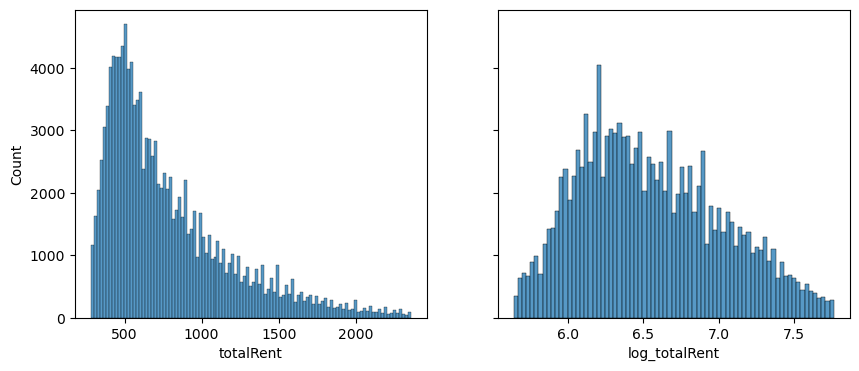

In [91]:
df['log_totalRent'] = np.log(df['totalRent'])
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
sns.histplot(df['totalRent'], ax=axes[0])
sns.histplot(df['log_totalRent'], ax=axes[1])

predicting log prices are more meaningfull since it's more similar to Normal distr.

## inspect each feature

- correlation with `totalRent`
- correlation with other related features 
- plot histogram and determine thresholds for outliers
- define outlier func

In [93]:
sorted(df.columns)

['balcony',
 'baseRent',
 'baseRentRange',
 'cellar',
 'condition',
 'date',
 'description',
 'electricityBasePrice',
 'electricityKwhPrice',
 'energyEfficiencyClass',
 'facilities',
 'firingTypes',
 'floor',
 'garden',
 'geo_bln',
 'geo_krs',
 'geo_plz',
 'hasKitchen',
 'heatingCosts',
 'heatingType',
 'houseNumber',
 'interiorQual',
 'lastRefurbish',
 'lift',
 'livingSpace',
 'livingSpaceRange',
 'log_totalRent',
 'newlyConst',
 'noParkSpaces',
 'noRooms',
 'noRoomsRange',
 'numberOfFloors',
 'petsAllowed',
 'picturecount',
 'pricetrend',
 'regio1',
 'regio2',
 'regio3',
 'scoutId',
 'serviceCharge',
 'street',
 'streetPlain',
 'telekomHybridUploadSpeed',
 'telekomTvOffer',
 'telekomUploadSpeed',
 'thermalChar',
 'totalRent',
 'typeOfFlat',
 'yearConstructed',
 'yearConstructedRange']

### balcony , hasKitchen, cellar and other binaries

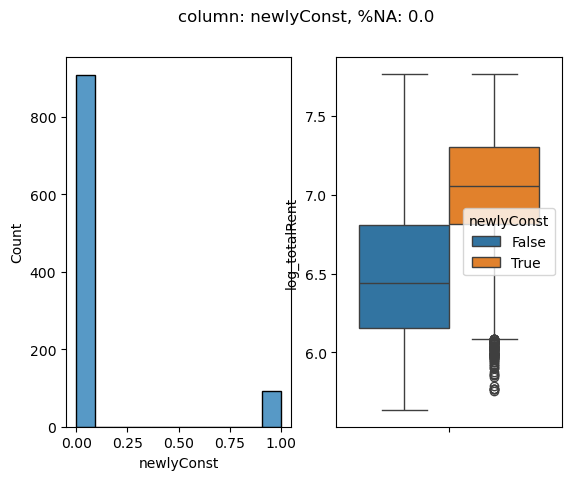

In [178]:
fname = 'newlyConst' # feature name
fig, axes = plt.subplots(ncols=2)
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');


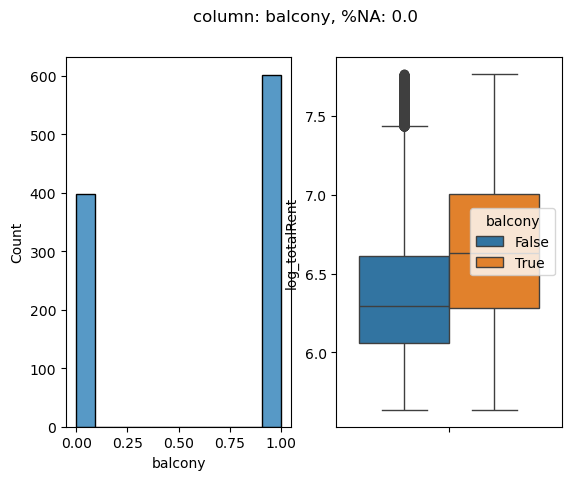

In [ ]:
fname = 'balcony' # feature name
fig, axes = plt.subplots(ncols=2)
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');


In [95]:
df[fname].value_counts()

True     79728
False    49211
Name: balcony, dtype: int64

no outliers, slight correlation. keep all

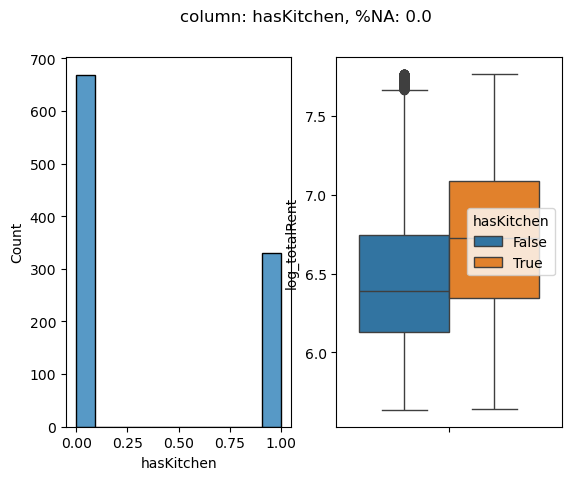

In [169]:
fname = 'hasKitchen' # feature name
fig, axes = plt.subplots(ncols=2)
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');


In [97]:
df[fname].value_counts()

False    85757
True     43182
Name: hasKitchen, dtype: int64

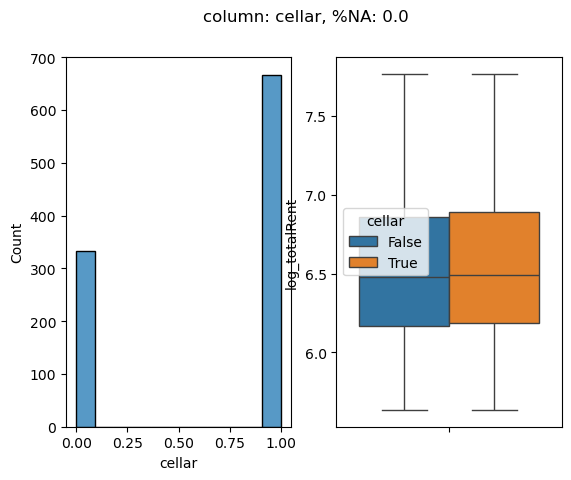

In [170]:
fname = 'cellar' # feature name
fig, axes = plt.subplots(ncols=2)
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');


In [99]:
df[fname].value_counts(), df[fname].isna().sum()

(True     82602
 False    46337
 Name: cellar, dtype: int64,
 0)

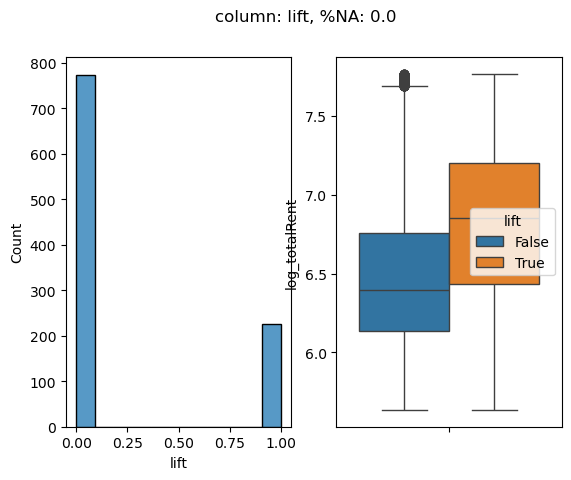

In [171]:

fname = 'lift' # feature name
fig, axes = plt.subplots(ncols=2)
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');


In [ ]:
fname = 'garden'
df[fname].value_counts()

False    108034
True      26391
Name: garden, dtype: int64

<AxesSubplot:ylabel='log_totalRent'>

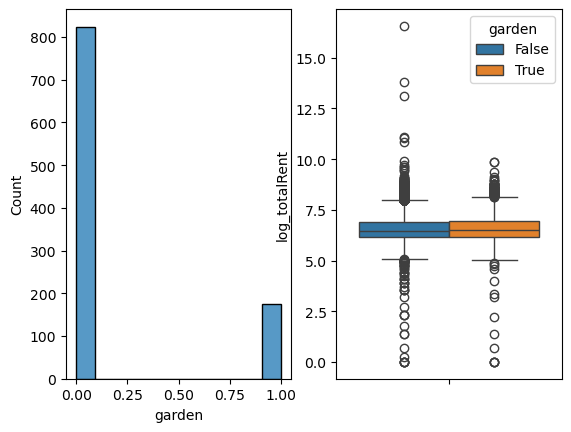

In [ ]:
fig, axes = plt.subplots(ncols=2)
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])

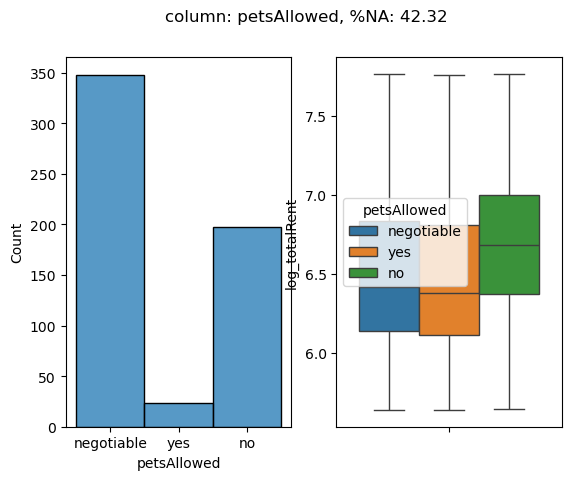

In [185]:

fname = 'petsAllowed' # feature name
fig, axes = plt.subplots(ncols=2)
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');


### condition

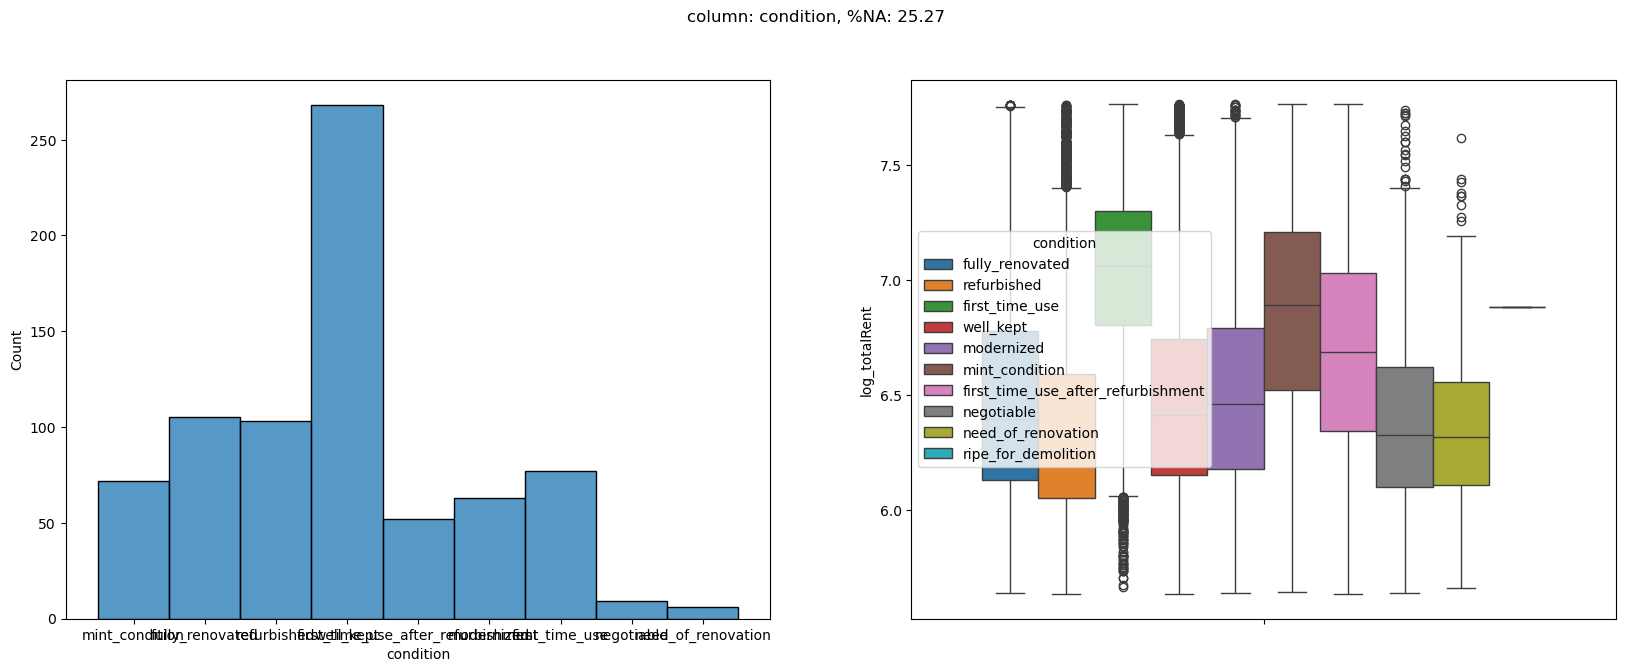

In [108]:
fname = 'condition' # feature name
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');

In [101]:
df[fname].value_counts()

well_kept                             32358
refurbished                           12910
fully_renovated                       12821
mint_condition                        10368
first_time_use                        10312
modernized                             8276
first_time_use_after_refurbishment     7539
negotiable                             1114
need_of_renovation                      651
ripe_for_demolition                       1
Name: condition, dtype: int64

In [111]:
# assign na's as other
df.loc[df[fname]=='ripe_for_demolition', fname] = 'other'
df.loc[df[fname].isna(), fname] = 'other'

### date

<AxesSubplot:xlabel='log_totalRent', ylabel='Count'>

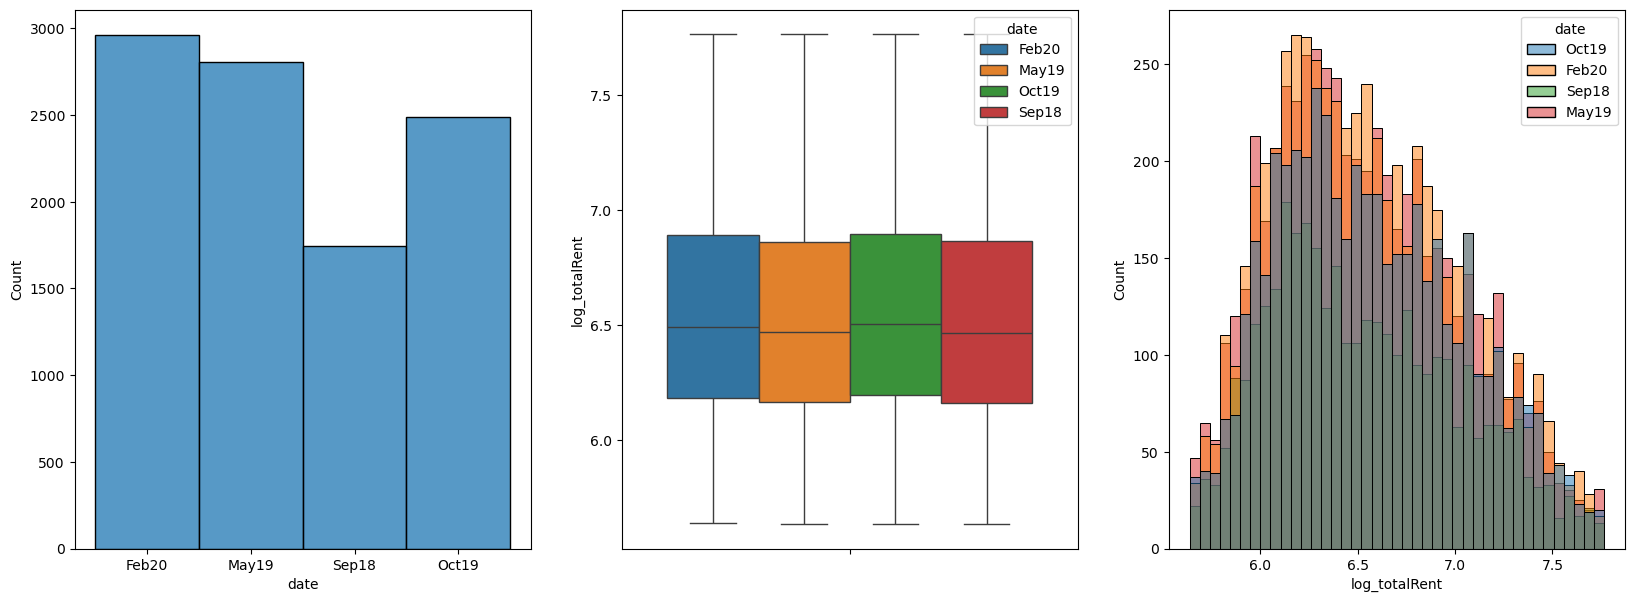

In [112]:
fname = 'date' # feature name
fig, axes = plt.subplots(ncols=3, figsize=(20,7))
sns.histplot(data=df.sample(10000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
sns.histplot(data=df.sample(20000), x=target, hue=fname, ax=axes[2])


In [113]:
df[fname].value_counts()

Feb20    37950
May19    36587
Oct19    31997
Sep18    22405
Name: date, dtype: int64

no outliers, appears no correlation. may drop but may be informative in combination with other features

### electricity and energy efficiency

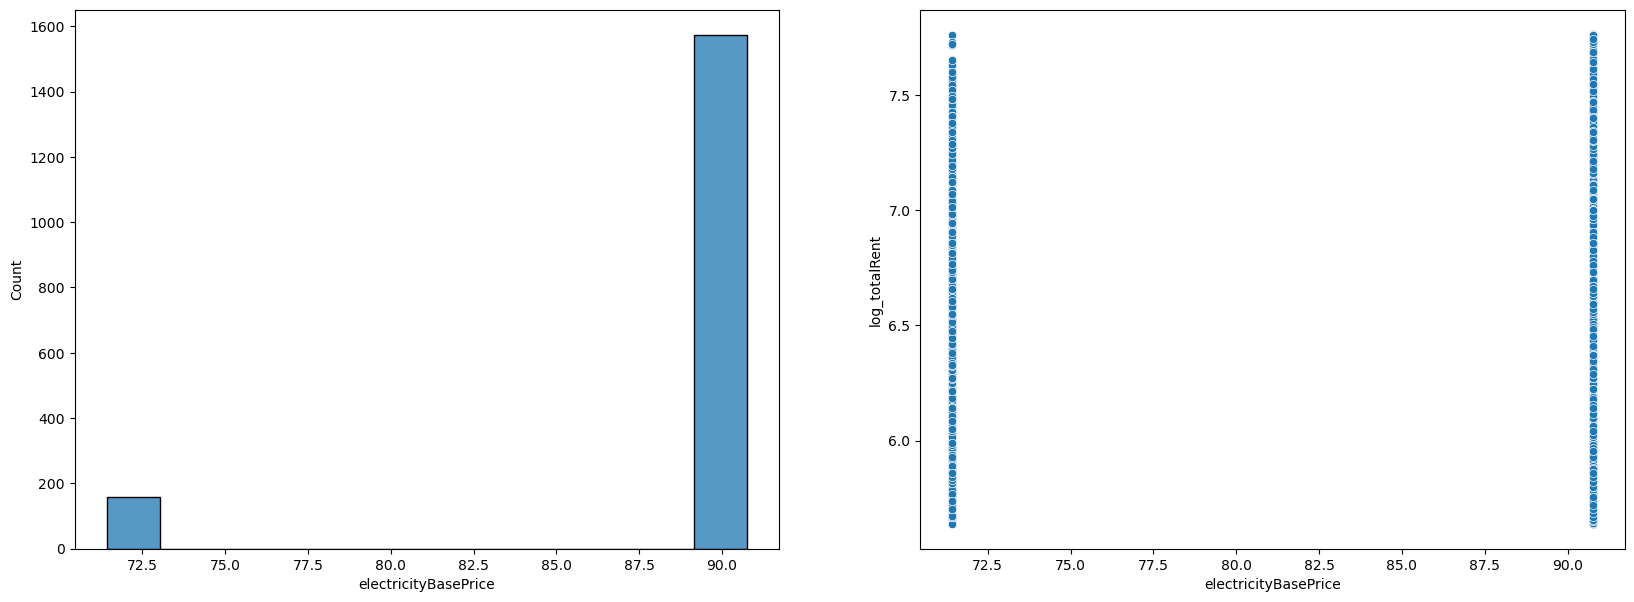

In [128]:
fname = 'electricityBasePrice' # feature name
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(10000), x=fname, ax=axes[0])
sns.scatterplot(data=df, y=target, x=fname, ax=axes[1]);

In [129]:
df[fname].value_counts()

90.76    20447
71.43     1962
Name: electricityBasePrice, dtype: int64

In [130]:
df[['date',fname]].groupby('date').agg({fname: lambda x: x.isna().sum()/len(x)})

,electricityBasePrice
date,
Feb20,1.000000
May19,0.999891
Oct19,1.000000
Sep18,0.000000


<AxesSubplot:xlabel='log_totalRent', ylabel='Count'>

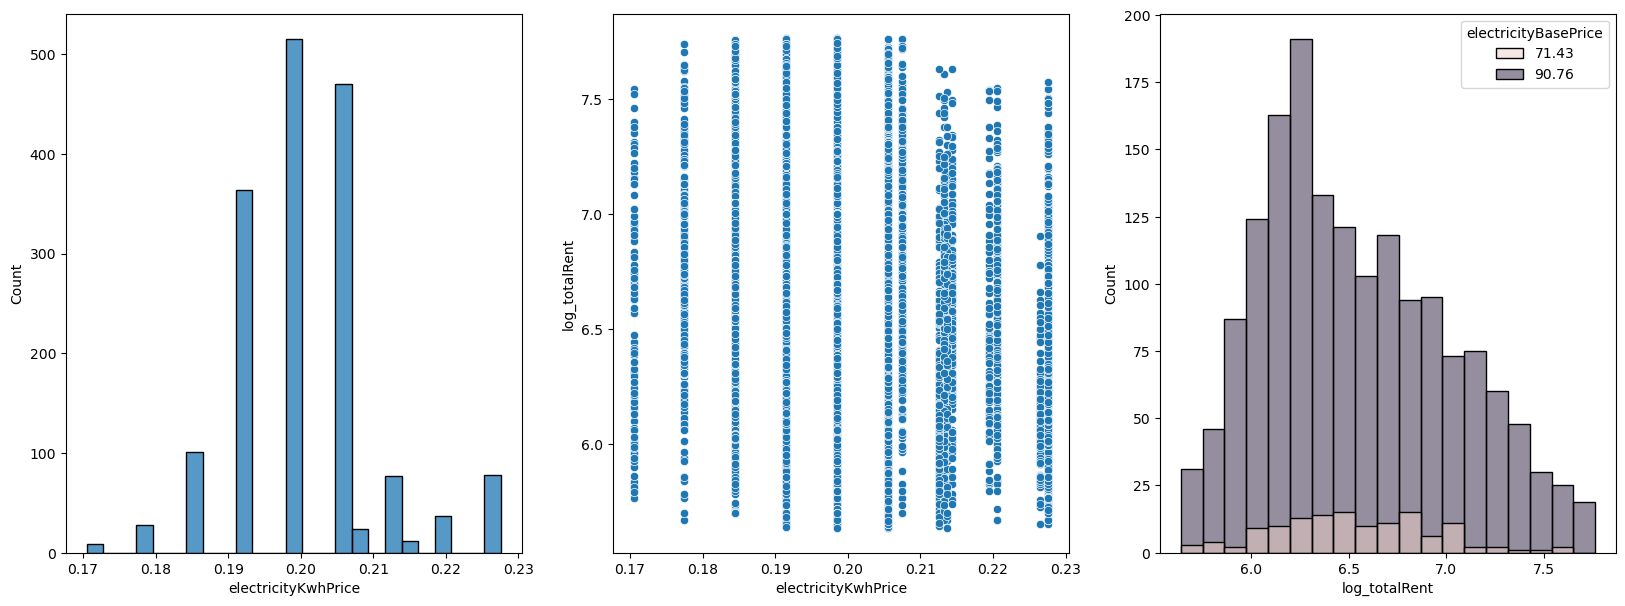

In [131]:
fname = 'electricityKwhPrice' # feature name
fig, axes = plt.subplots(ncols=3, figsize=(20,7))
sns.histplot(data=df.sample(10000), x=fname, ax=axes[0])
sns.scatterplot(data=df, y=target, x=fname, ax=axes[1], )
sns.histplot(data=df.sample(10000), x=target, ax=axes[2], hue='electricityBasePrice')


In [31]:
df[['date',fname]].groupby('date').agg({fname: lambda x: x.isna().sum()/len(x)})

,electricityKwhPrice
date,
Feb20,1.000000
May19,0.999921
Oct19,1.000000
Sep18,0.000000


looks like these features are deprecated after 2018. 

<AxesSubplot:xlabel='log_totalRent', ylabel='Count'>

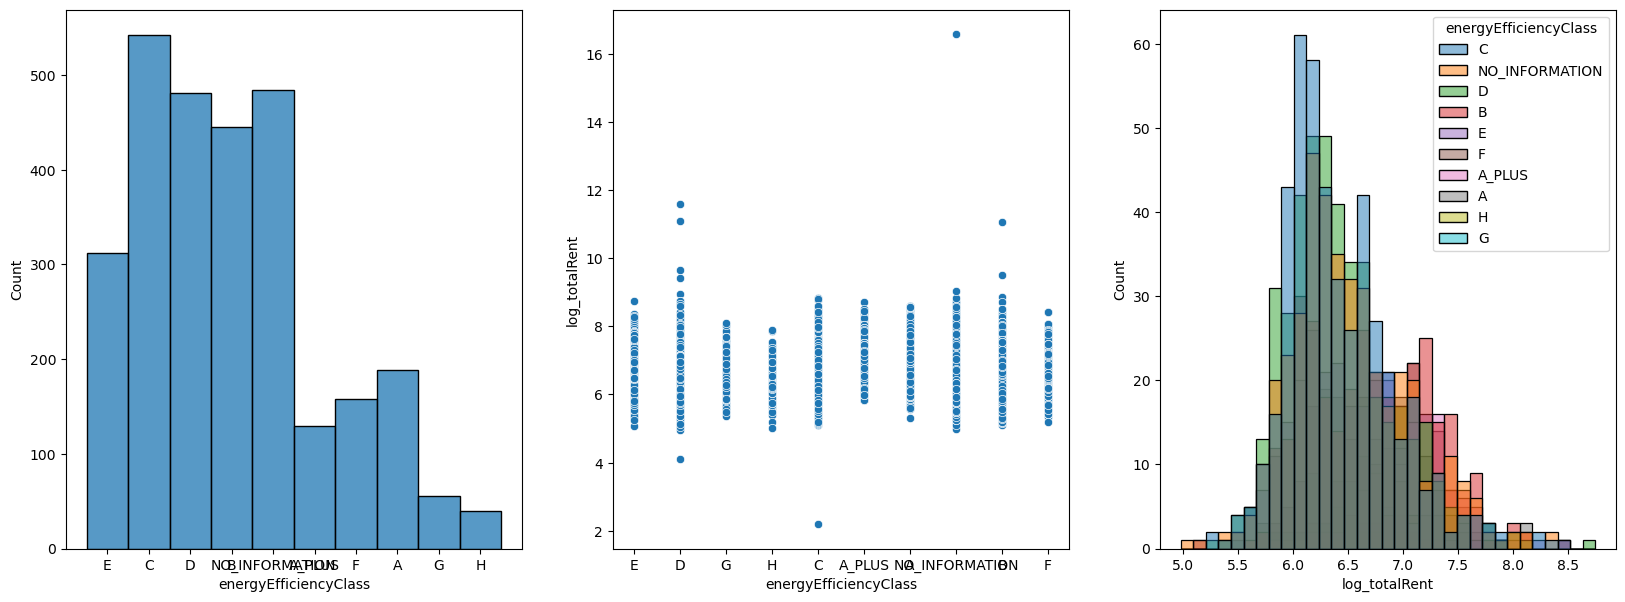

In [154]:
fname = 'energyEfficiencyClass' # feature name
fig, axes = plt.subplots(ncols=3, figsize=(20,7))
sns.histplot(data=df.sample(10000), x=fname, ax=axes[0])
sns.scatterplot(data=df, y=target, x=fname, ax=axes[1], )
sns.histplot(data=df.sample(10000), x=target, ax=axes[2], hue=fname)


<AxesSubplot:xlabel='thermalChar', ylabel='Count'>

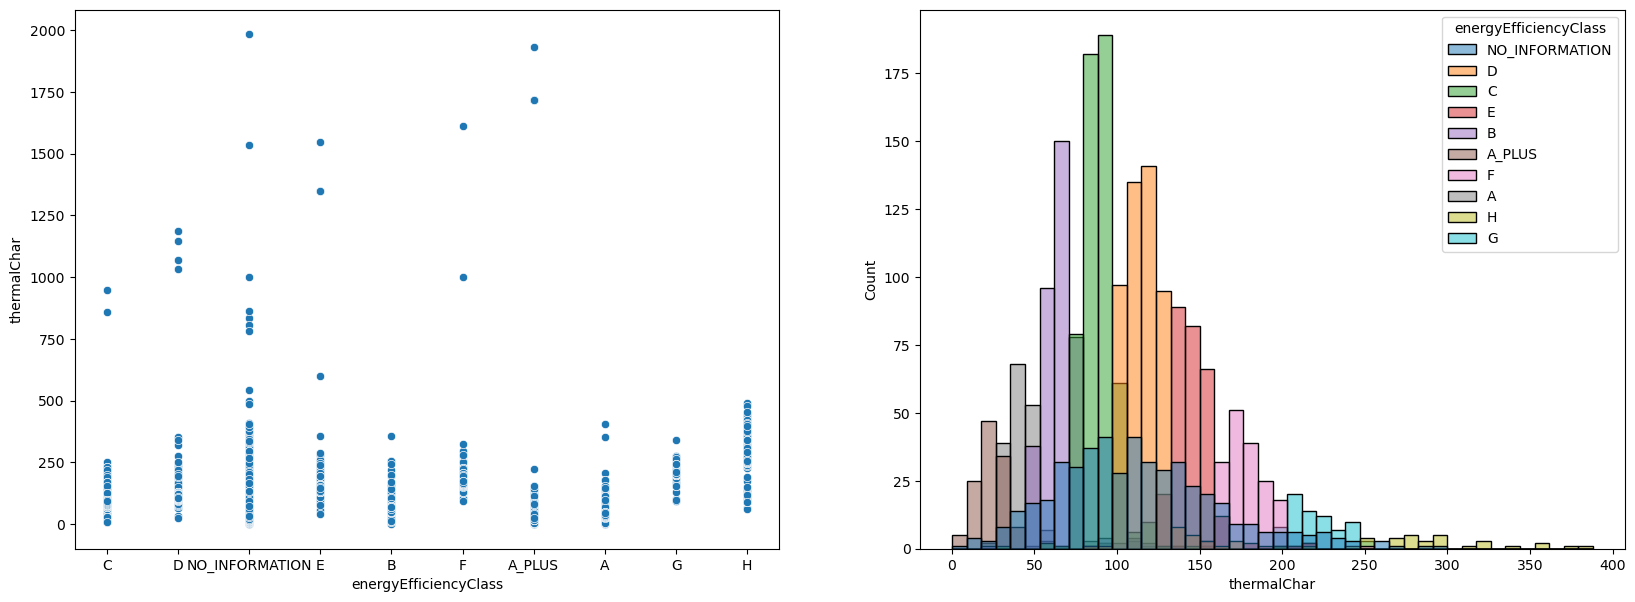

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.scatterplot(data=df, y='thermalChar', x=fname, ax=axes[0], )
sns.histplot(data=df.sample(10000), x='thermalChar', ax=axes[1], hue=fname)


convert to integer , since there's a quantitative relation between this seemingly categorical class
can use `thermalChar` instead

In [157]:
sorted(df[fname].astype(str).unique())

['A', 'A_PLUS', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'NO_INFORMATION', 'nan']

In [158]:
def map_energyEfficiency(x):
    mapping = ['A_PLUS', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
    if str(x) in mapping:
        return mapping.index(x)
    else:
        return np.nan

df[fname].apply(map_energyEfficiency)

4693      NaN
53403     5.0
130049    NaN
181333    NaN
10016     NaN
         ... 
89112     NaN
150031    NaN
205515    NaN
75409     NaN
38299     1.0
Name: energyEfficiencyClass, Length: 134189, dtype: float64

In [21]:
sum(df[fname].isna()), sum(df['thermalChar'].isna()), sum(df['thermalChar'].isna() & df[fname].isna() )

(95639, 53124, 52078)

### firingTypes | heatingType

In [132]:
fname = 'firingTypes' # feature name
df[fname].value_counts()[-20:]

solar_heating:heat_supply                                            1
gas:local_heating                                                    1
oil:natural_gas_light                                                1
district_heating:electricity:combined_heat_and_power_fossil_fuels    1
solar_heating:gas:wood                                               1
solar_heating:gas:district_heating                                   1
geothermal:wood                                                      1
natural_gas_light:natural_gas_heavy                                  1
solar_heating:wood                                                   1
gas:heat_supply                                                      1
gas:environmental_thermal_energy                                     1
gas:liquid_gas                                                       1
electricity:environmental_thermal_energy                             1
district_heating:bio_energy                                          1
solar_

In [133]:
# separate combined categories as one hot 
heating_types = set()
for string in df[fname].unique():
    for tmp in str(string).split(':'):
        heating_types.add(tmp)

list(heating_types)

['gas',
 'coal_coke',
 'wind_energy',
 'geothermal',
 'combined_heat_and_power_renewable_energy',
 'wood',
 'hydro_energy',
 'wood_chips',
 'solar_heating',
 'combined_heat_and_power_regenerative_energy',
 'nan',
 'heat_supply',
 'oil',
 'local_heating',
 'combined_heat_and_power_bio_energy',
 'natural_gas_heavy',
 'liquid_gas',
 'pellet_heating',
 'combined_heat_and_power_fossil_fuels',
 'electricity',
 'natural_gas_light',
 'district_heating',
 'bio_energy',
 'environmental_thermal_energy',
 'steam_district_heating',
 'coal']

In [135]:
selected_types = sorted(['gas','wind','local','pellet','wood','oil','geothermal','liquid_gas','bio','renewable', 'regenerative', 'fossil', 'combined',
                         'electricity','coal','hydro','solar','natural_gas_heavy','natural_gas_light','district','steam','thermal'])

def to_onehot_firing(x):
    onehot_vec = np.zeros(len(selected_types)) # may be more than 1 hot, as in multi label
    for i, firingtype in enumerate(selected_types):
        if firingtype in str(x):
            onehot_vec[i] = 1

    return onehot_vec

firings_df = pd.DataFrame(df[fname].apply(to_onehot_firing).explode().values.reshape((-1,len(selected_types))), columns=selected_types, index=df.index)
firings_df.sample(4)

,bio,coal,combined,district,electricity,fossil,gas,geothermal,hydro,liquid_gas,...,natural_gas_light,oil,pellet,regenerative,renewable,solar,steam,thermal,wind,wood
168507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259832,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145461,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
# this is better than firingTypes, lower cardinality, less noisy, discard above for firingType
fname = 'heatingType'
df[fname].value_counts()

central_heating                   62356
district_heating                  11629
gas_heating                        9675
self_contained_central_heating     9214
floor_heating                      8248
oil_heating                        2444
heat_pump                          1306
combined_heat_and_power_plant       969
night_storage_heater                653
wood_pellet_heating                 496
electric_heating                    401
stove_heating                       156
solar_heating                        86
Name: heatingType, dtype: int64

In [184]:
# out of NA heatingTypes some firingTypes are relevant categories 
df[df[fname].isna()]['firingTypes'].value_counts()

gas                                                                        4527
district_heating                                                           3628
oil                                                                         526
electricity                                                                 321
natural_gas_light                                                           312
natural_gas_heavy                                                           284
local_heating                                                               103
geothermal                                                                   87
pellet_heating                                                               71
gas:electricity                                                              34
combined_heat_and_power_fossil_fuels                                         30
environmental_thermal_energy                                                 28
combined_heat_and_power_renewable_energy

In [137]:
# recover NA's by most observed FiringTypes 
mapping = {
    'gas':'gas_heating',
    'district_heating':'district_heating',
    'oil' : 'oil_heating',
    'electricity' : 'electric_heating',
}
fname = 'heatingType'
df.loc[df[fname].isna(),fname] = df[df[fname].isna()]['firingTypes'].apply(lambda x : mapping.get(x,x))
df['heatingType'].isna().sum()

11753

### floor

In [145]:
fname = 'floor' # feature name
print(df[fname].max())
# some outliers, limit max to 20
df.loc[df[fname]>20,fname] = 20


50.0


<AxesSubplot:xlabel='floor', ylabel='log_totalRent'>

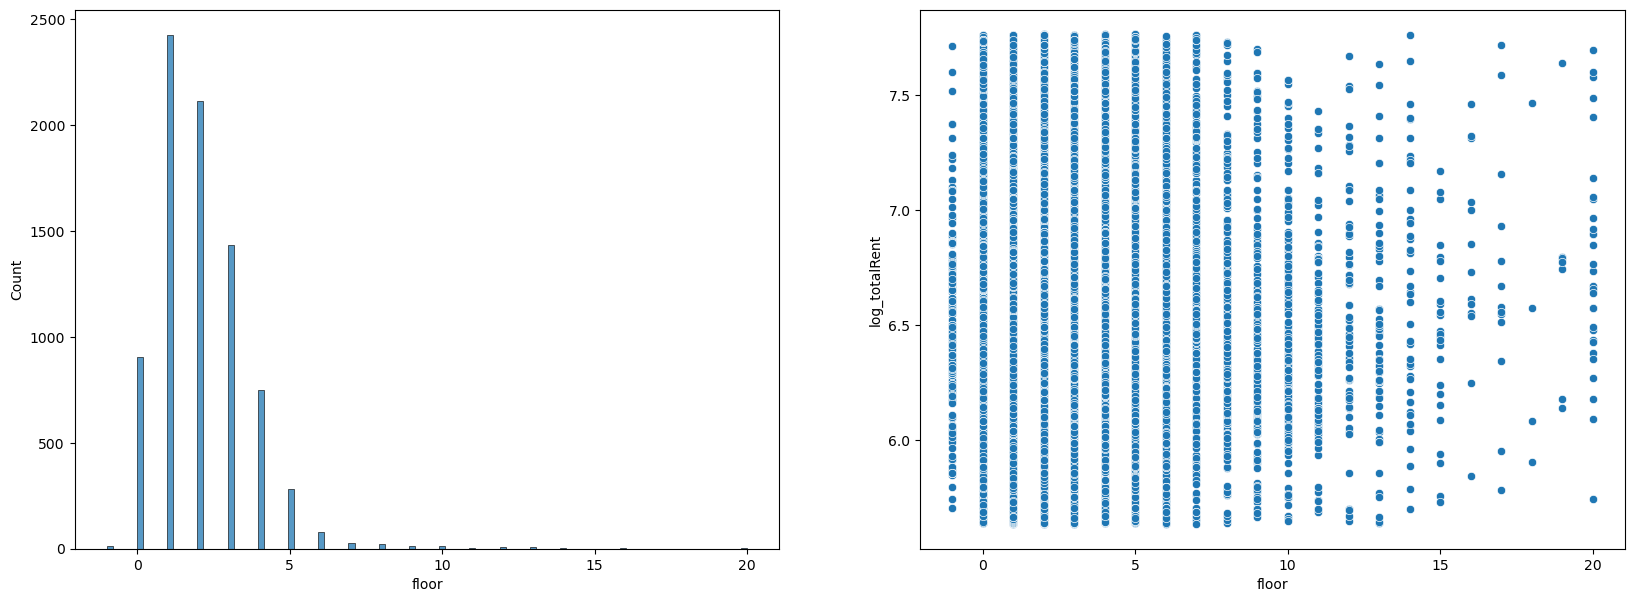

In [146]:
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(10000), x=fname, ax=axes[0])
sns.scatterplot(data=df, y=target, x=fname, ax=axes[1], )


### geo

In [114]:
fname = 'geo_bln'
df[fname] = df[fname].astype(str)
df[fname].value_counts()

Nordrhein_Westfalen       31075
Sachsen                   27624
Bayern                    10023
Sachsen_Anhalt             9641
Hessen                     8460
Niedersachsen              8157
Baden_Württemberg          7656
Berlin                     4656
Rheinland_Pfalz            4064
Thüringen                  3987
Brandenburg                3395
Schleswig_Holstein         3262
Mecklenburg_Vorpommern     3112
Hamburg                    1685
Bremen                     1447
Saarland                    695
Name: geo_bln, dtype: int64

<AxesSubplot:ylabel='log_totalRent'>

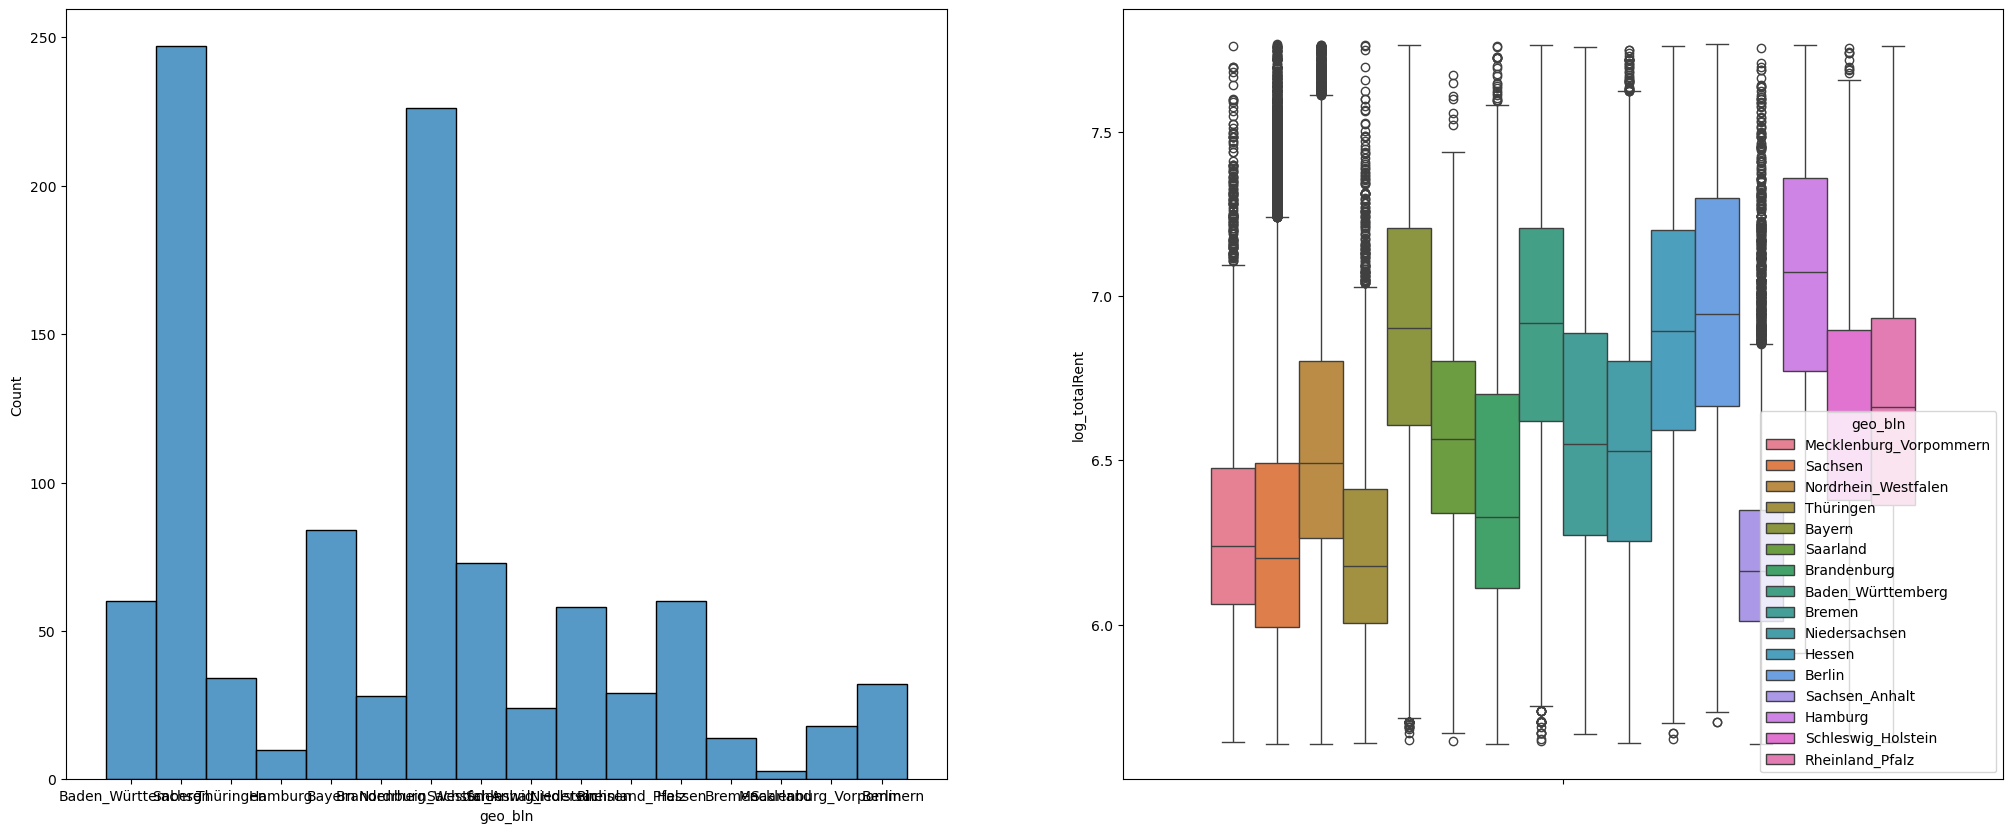

In [117]:
fig, axes = plt.subplots(ncols=2, figsize=(25,10))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])

In [148]:
fname = 'geo_krs'
df[fname] = df[fname].astype(str)
df[fname].value_counts(normalize=True)

Leipzig                         0.052087
Chemnitz                        0.044703
Berlin                          0.036110
Dresden                         0.028502
Magdeburg                       0.018637
                                  ...   
Schwabach                       0.000093
Haßberge_Kreis                  0.000093
Lichtenfels_Kreis               0.000085
Neustadt_a.d._Waldnaab_Kreis    0.000054
Kronach_Kreis                   0.000031
Name: geo_krs, Length: 419, dtype: float64

In [122]:
fname = 'geo_plz'
df[fname].value_counts(normalize=True)

9126     0.007259
9130     0.007143
9131     0.005840
9112     0.005778
9113     0.005018
           ...   
80673    0.000008
21787    0.000008
88448    0.000008
63605    0.000008
9162     0.000008
Name: geo_plz, Length: 6583, dtype: float64

In [163]:
# too many categories, group less frequent ones
to_group = df[fname].value_counts()[(df[fname].value_counts(normalize=True)<0.01)].index
df[fname] = df[fname].apply(lambda x: 99999 if x in to_group else x )
df[fname].value_counts()

99999    94084
9126      1017
9130      1000
9112       850
9131       823
         ...  
4838       102
6120       101
50354      101
39106      100
52249      100
Name: geo_plz, Length: 193, dtype: int64

### other categoricals

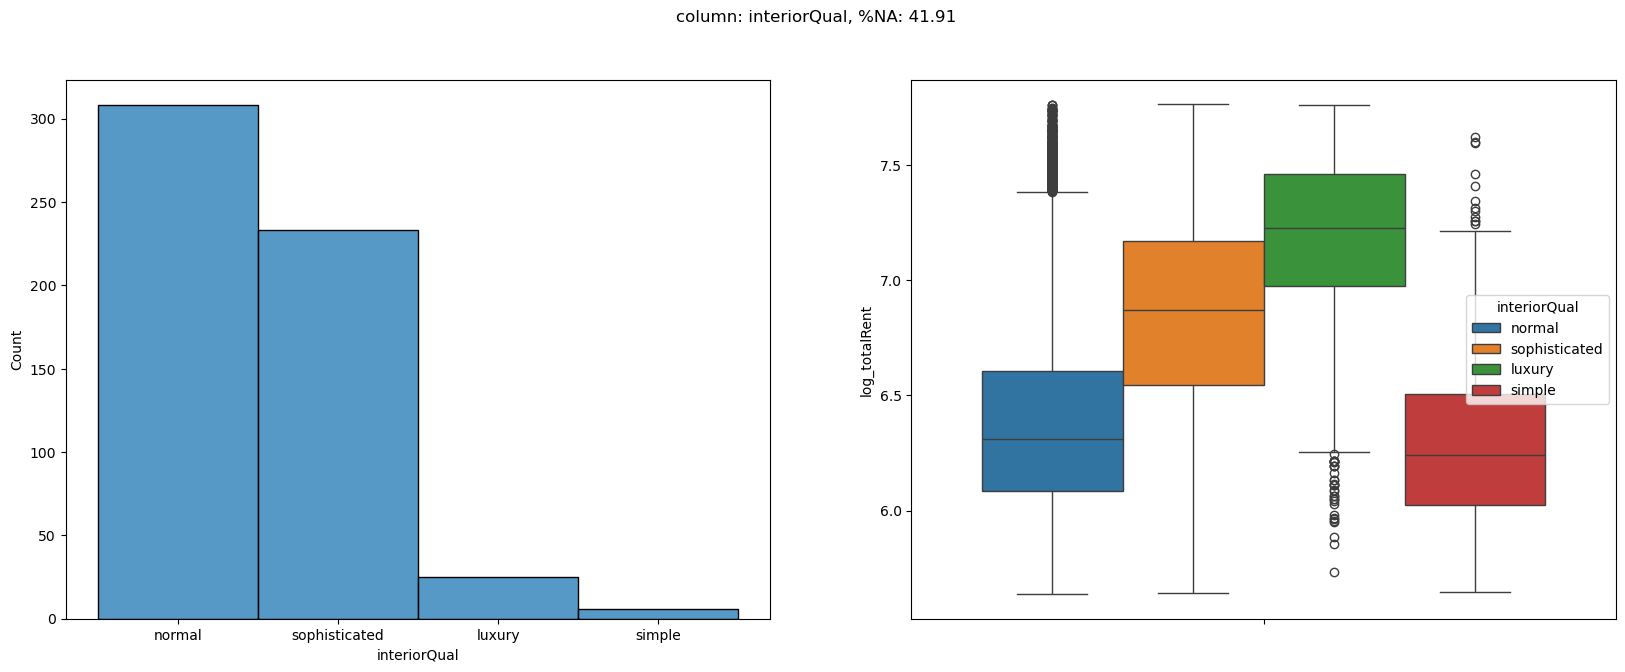

In [164]:
fname = 'interiorQual'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');

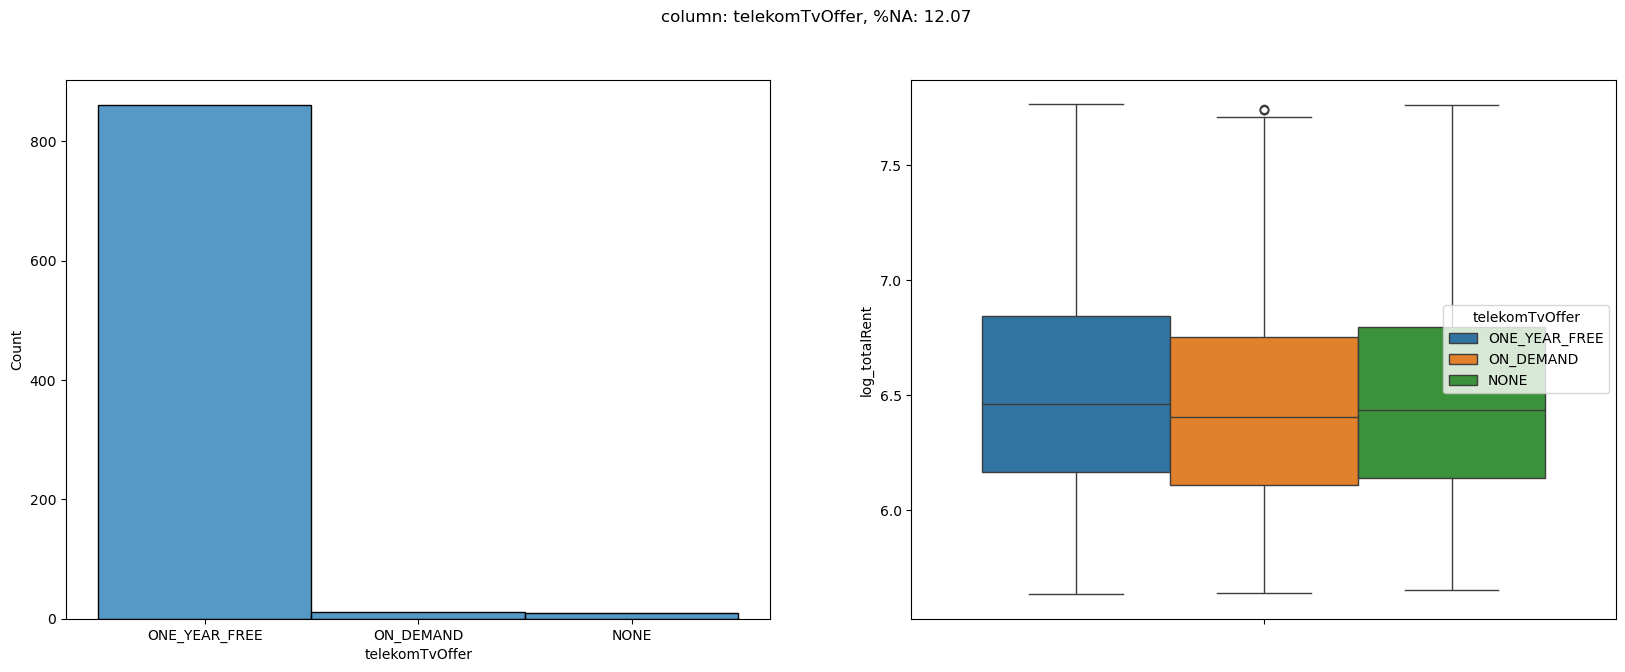

In [199]:
fname = 'telekomTvOffer'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');

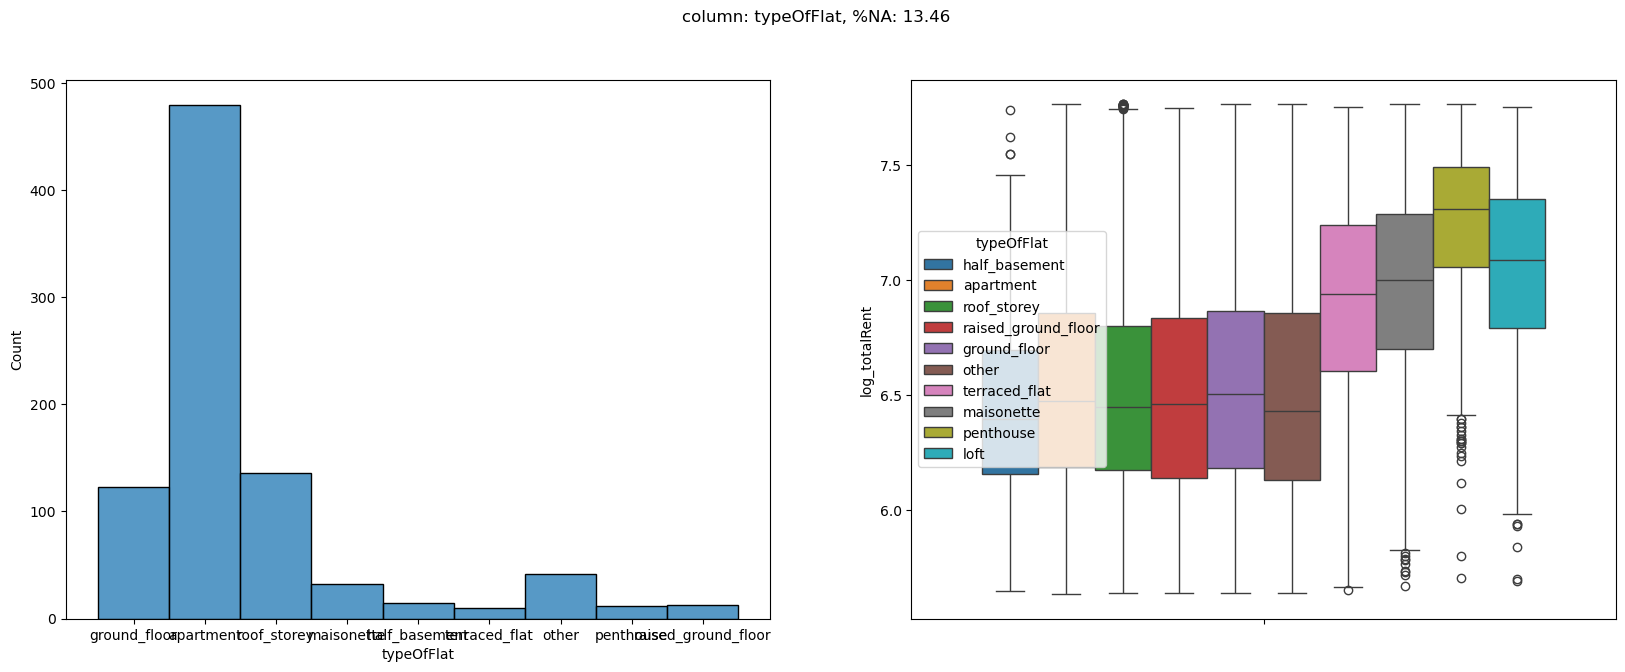

In [210]:
fname = 'typeOfFlat'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.boxplot(data=df, y=target, hue=fname, ax=axes[1])
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');

### other numericals

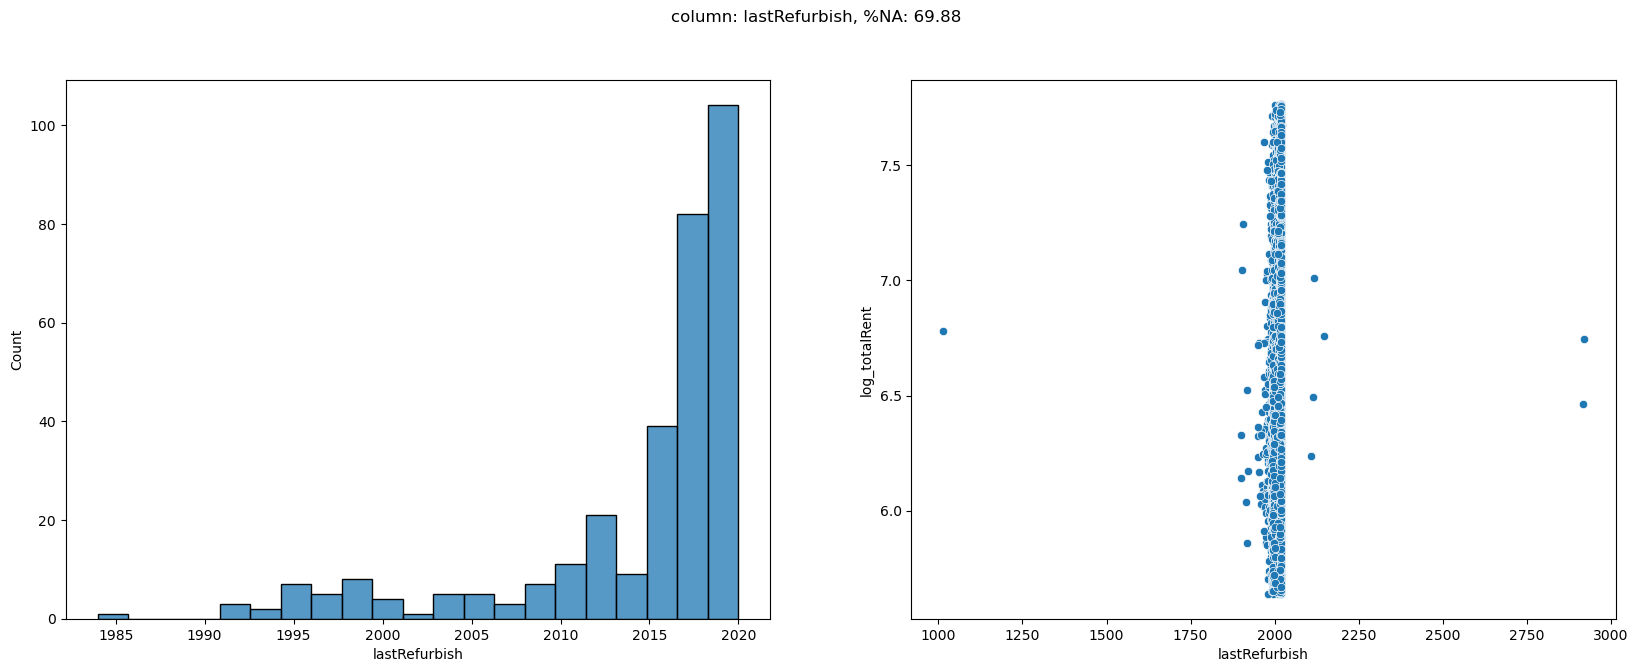

In [166]:
fname = 'lastRefurbish'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.scatterplot(data=df, y=target, x=fname, ax=axes[1]);
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# limit values to 1950-2024

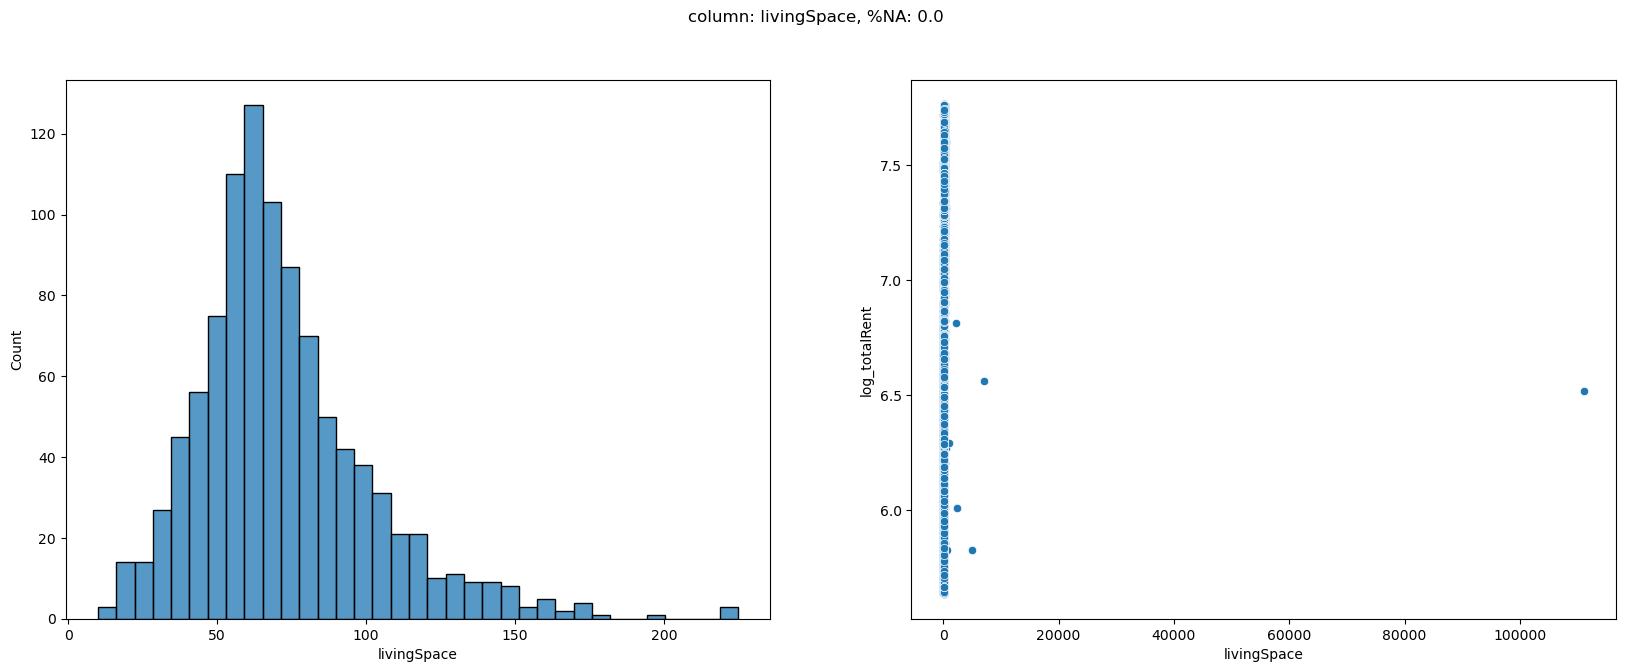

In [173]:
fname = 'livingSpace'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.scatterplot(data=df, y=target, x=fname, ax=axes[1]);
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# there are outliers, limit values to 5-200

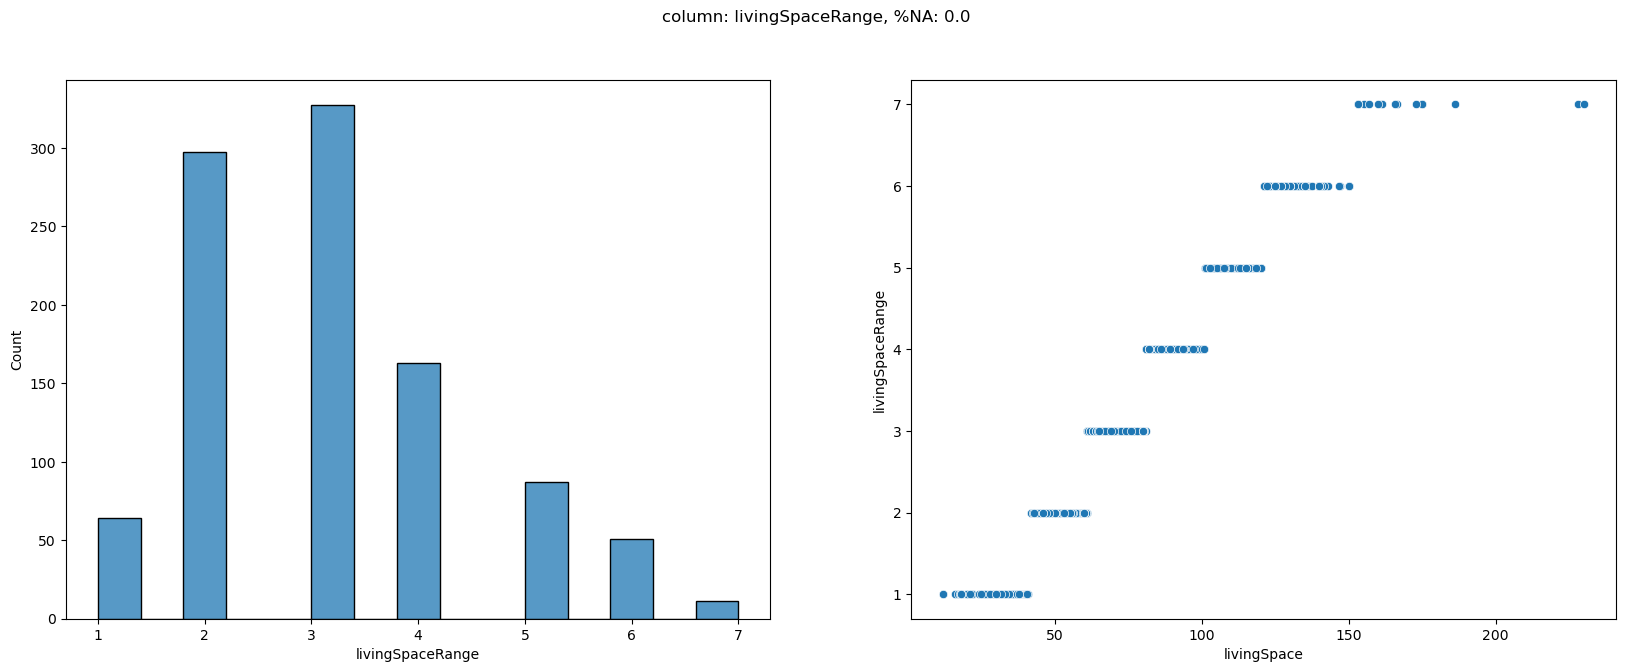

In [177]:
fname = 'livingSpaceRange'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.scatterplot(data=df.sample(1000), x='livingSpace', y=fname, ax=axes[1]);
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# this is redundant

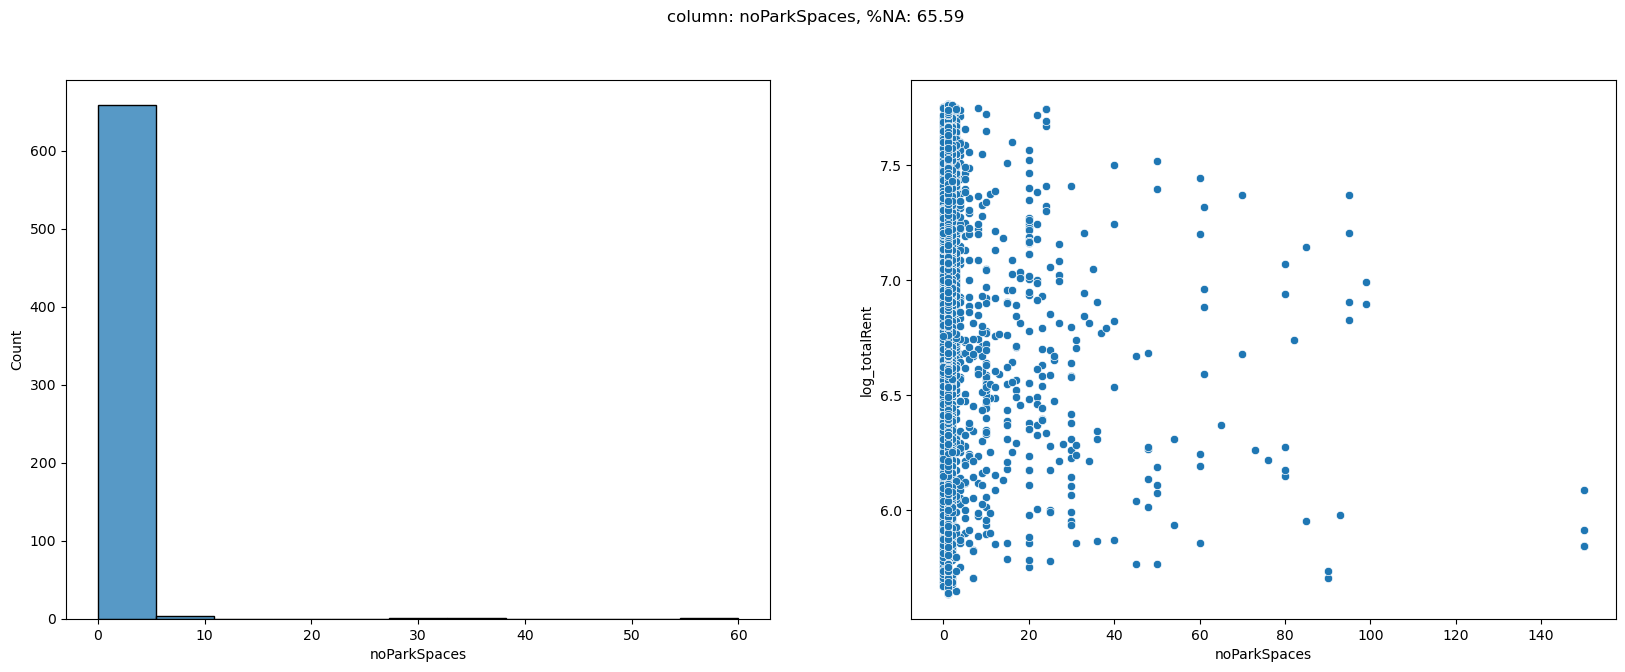

In [180]:
fname = 'noParkSpaces'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(2000), x=fname, ax=axes[0])
sns.scatterplot(data=df, y=target, x=fname, ax=axes[1]);
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# limit values to 5-200

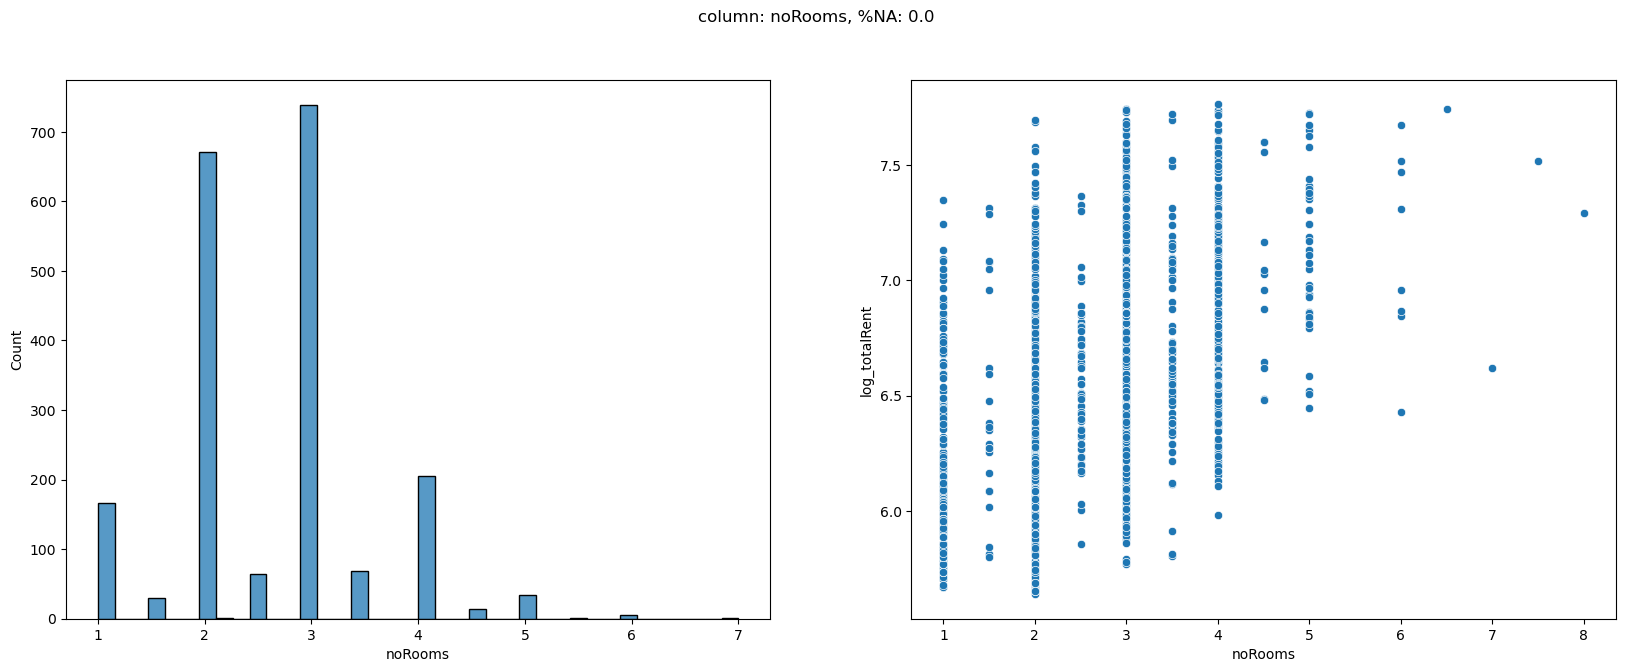

In [183]:
fname = 'noRooms'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(2000), x=fname, ax=axes[0])
sns.scatterplot(data=df.sample(2000), y=target, x=fname, ax=axes[1]);
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# limit values to 0-10, noRoomsRange is redundant

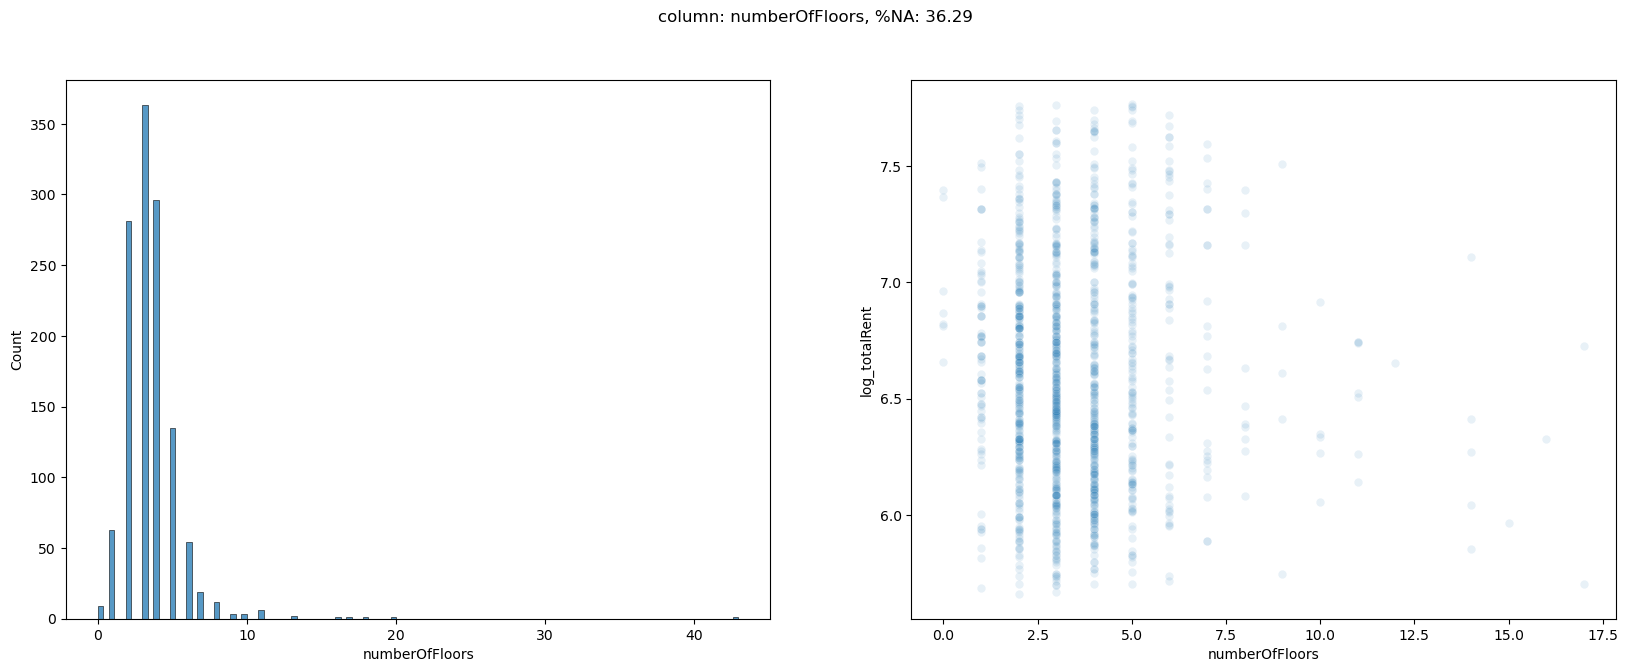

In [188]:
fname = 'numberOfFloors'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(2000), x=fname, ax=axes[0])
sns.scatterplot(data=df.sample(2000), y=target, x=fname, ax=axes[1], alpha=0.1);
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# limit values to 0-10 

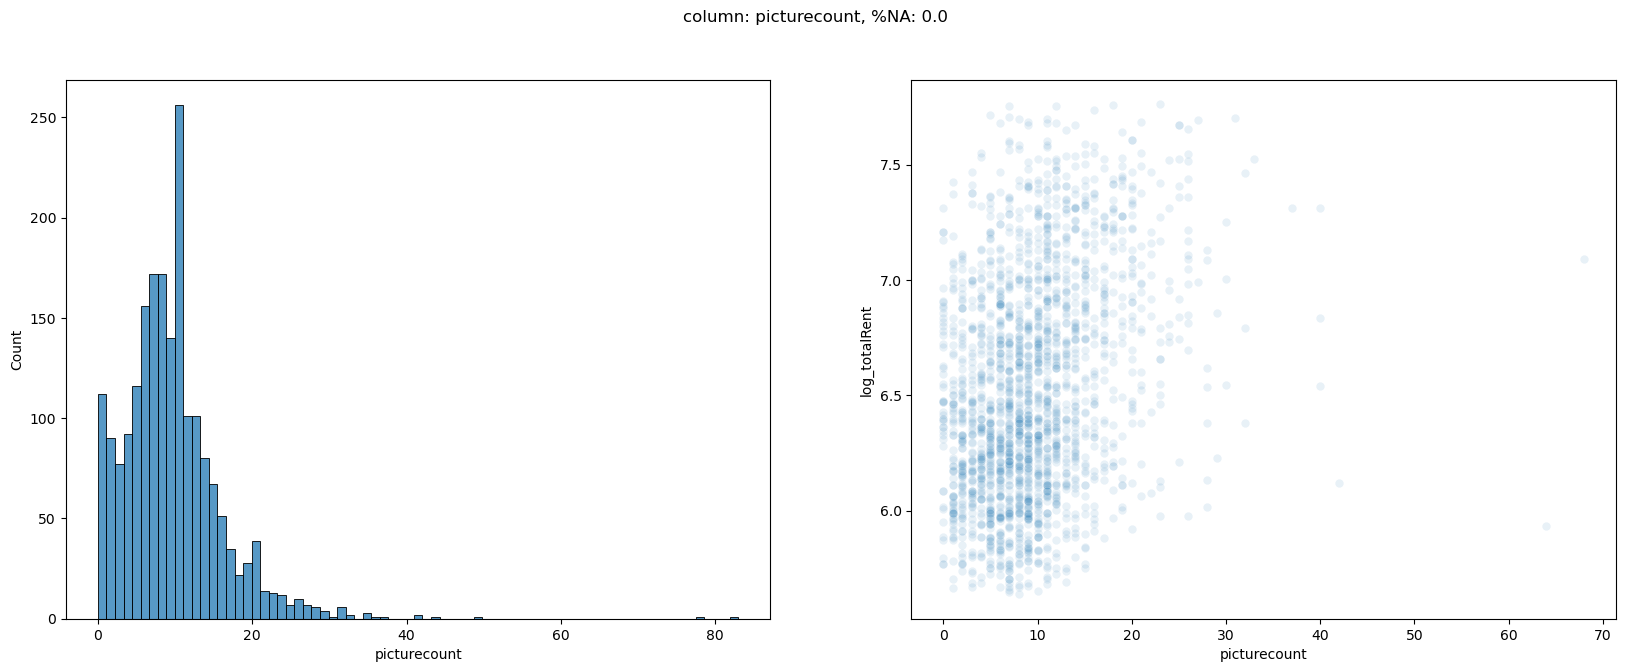

In [187]:
fname = 'picturecount'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(2000), x=fname, ax=axes[0])
sns.scatterplot(data=df.sample(2000), y=target, x=fname, ax=axes[1], alpha=0.1);
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# limit values to 1-40 , take log

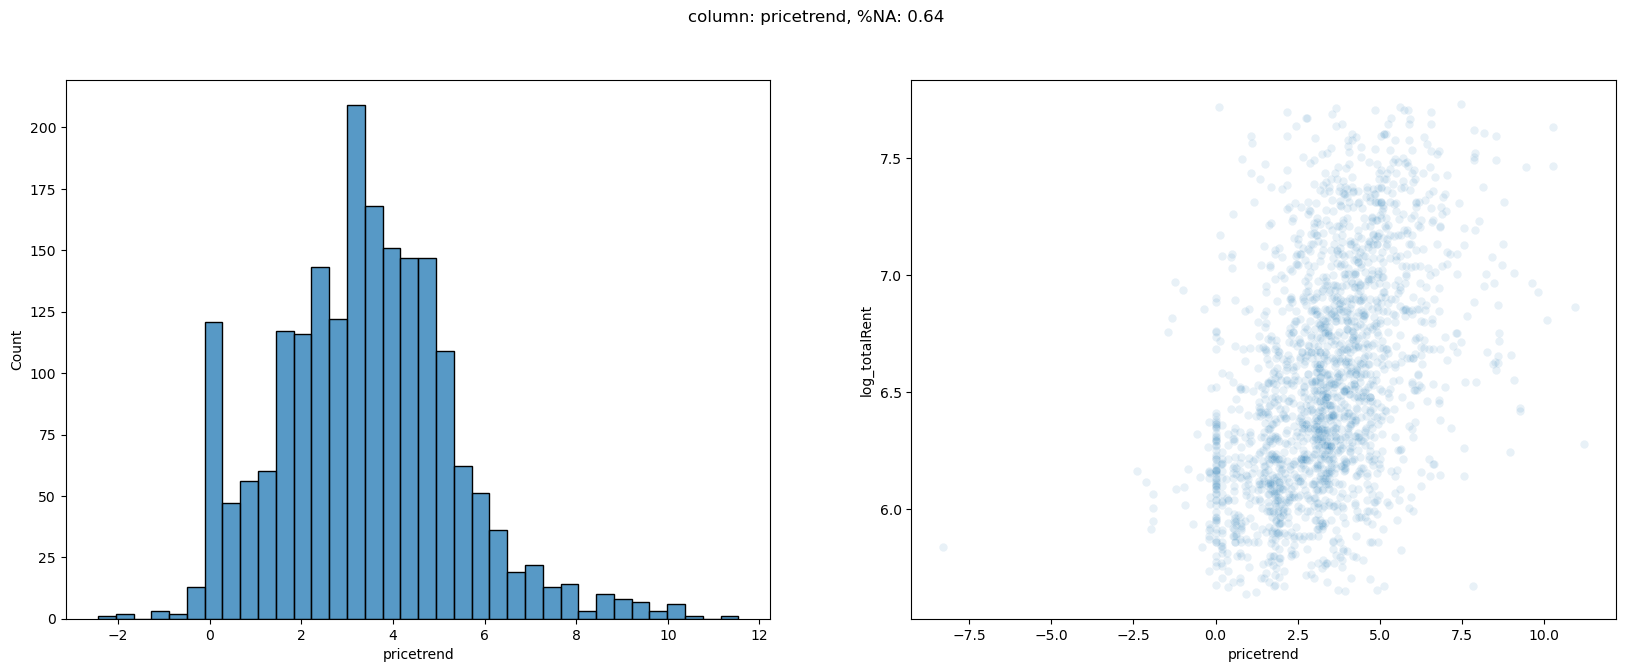

In [189]:
fname = 'pricetrend'
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
sns.histplot(data=df.sample(2000), x=fname, ax=axes[0])
sns.scatterplot(data=df.sample(2000), y=target, x=fname, ax=axes[1], alpha=0.1);
plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# not sure about what this is, might be leaking info

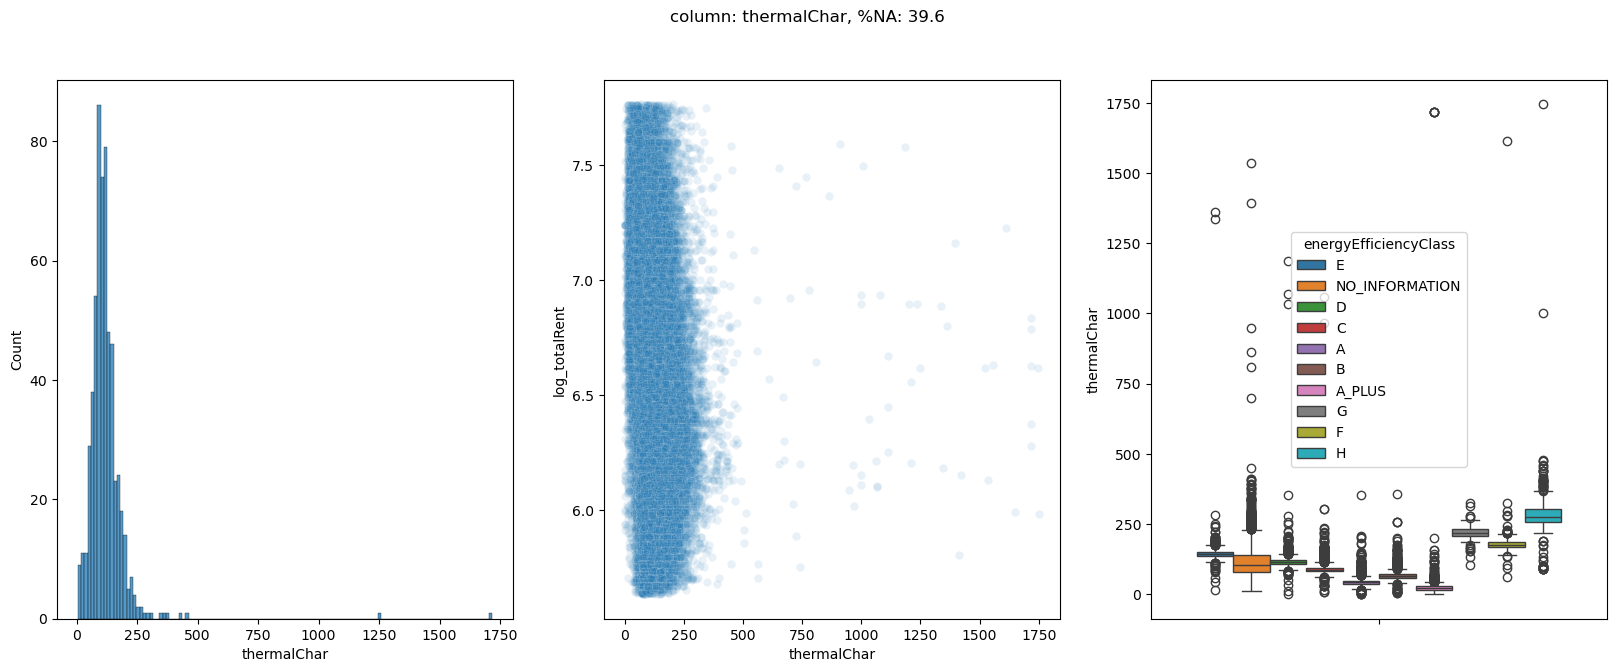

In [208]:
fname = 'thermalChar'
fig, axes = plt.subplots(ncols=3, figsize=(20,7))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.scatterplot(data=df, y=target, x=fname, ax=axes[1], alpha=0.1);
sns.boxplot(data=df, y=fname, hue='energyEfficiencyClass', ax=axes[2])

plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# energyEfficiencyClass is reduncant when we have thermalChar, limit max to 1000

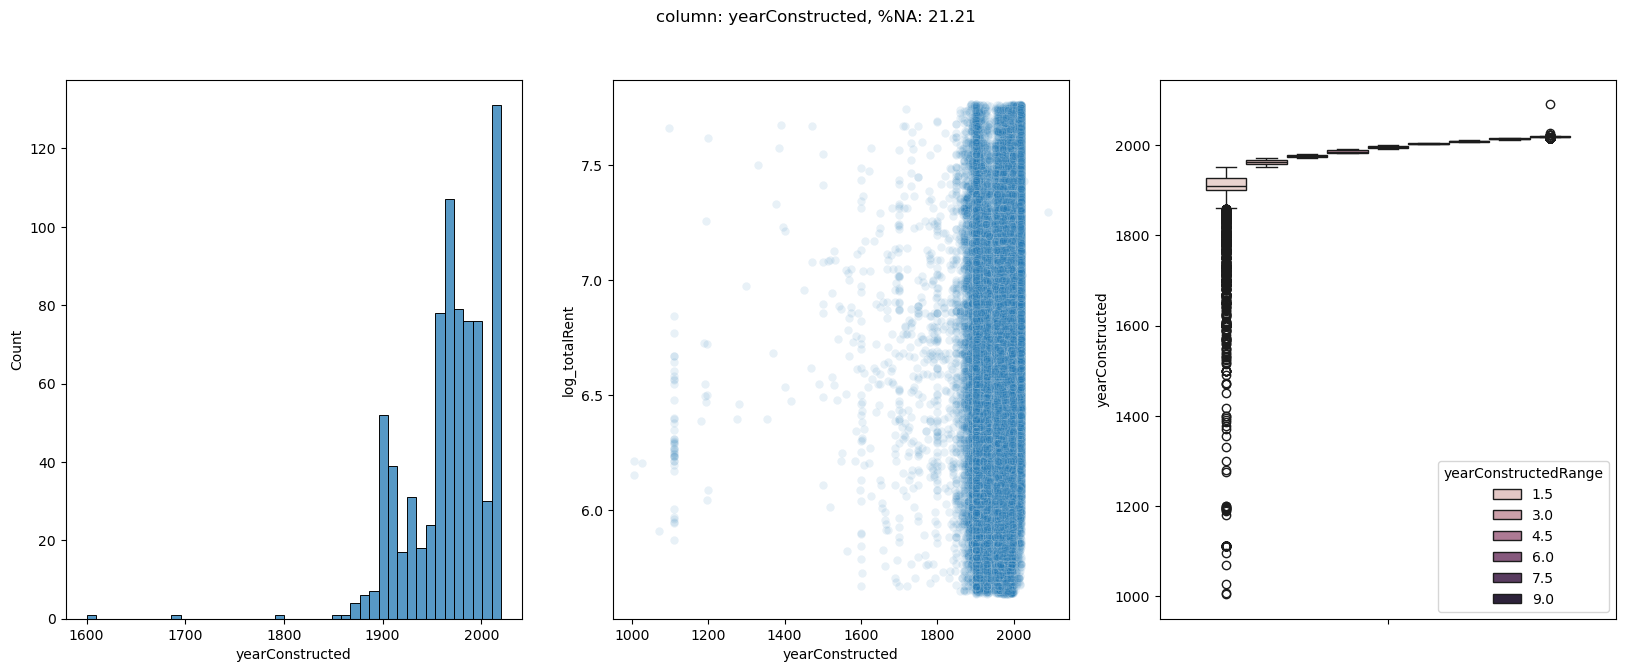

In [212]:
fname = 'yearConstructed'
fig, axes = plt.subplots(ncols=3, figsize=(20,7))
sns.histplot(data=df.sample(1000), x=fname, ax=axes[0])
sns.scatterplot(data=df, y=target, x=fname, ax=axes[1], alpha=0.1);
sns.boxplot(data=df, y=fname, hue='yearConstructedRange', ax=axes[2])

plt.suptitle(f'column: {fname}, %NA: {round(df[fname].isna().sum()/len(df)*100,2)}');
# we may subtract year from scraping date to find building age,
